**Materi Selanjutnya Menggunakan Dataset: Titanic**

# Missing Value and Outlier

Hasil EDA menunjukkan fakta berikut:
1. Terdapat missing value pada kolom ```Age```, ```Cabin```, ```Embarked```.
2. Outlier pada kolom ```Fare```.

## Penanganan Missing Value

Kenapa masalah Missing Value harus kita atasi?

> Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling.

Feature Engineering and Selection, 2019.

3 Tipe [Missing Value](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f):
1. Missing completely at random (MCAR). 
2. Missing at random (MAR). 
3. Missing not random (MNAR). 

<details>
<br>
Misal kita diminta untuk membuat model dari Age (Y) yang dipengaruhi oleh jenis kelamin (X) beberapa responden tidak memberikan jawaban atas pertanyaan berapa berat mereka. <br>
1. MCAR terjadi jika tidak ada alasan yang jelas kenapa responden tidak memberikan jawaban.<br>
2. MAR terjadi jika orang yang berjenis kelamin perempuan akan cenderung tidak memberikan jawaban jika ditanya berat, jadi missing value Y dipengaruhi oleh X.<br>
3. MNAR terjadi jika orang dengan kelas penghasilan tertentu, memiliki kecenderungan tidak memberikan jawaban. Sehingga missing value Y dipengaruhi oleh nilai lain yang tidak teramati.
</details>

Beberapa fungsi utama yang digunakan:
1. [library ```missingno```](https://github.com/ResidentMario/missingno)
2. [```df.isnull()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
3. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
4. [```df.groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
5. [```df.loc()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
6. [```df.column.plot()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
7. [```df.column.skew()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html)
8. [```df.column.value_counts()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

In [1]:
import pandas as pd
df_titanic = pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# lihat missing value dengan fungsi .isnul()
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

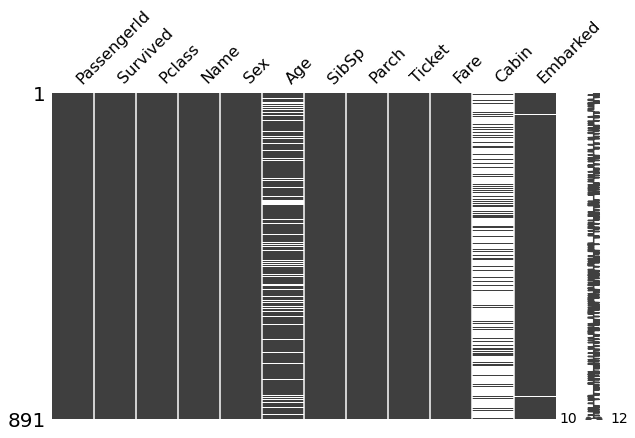

In [3]:
# visualiasi missing value dengan bantuan library
import missingno as msno
msno.matrix(df_titanic, figsize=(10, 6))

> Pertanyaan: missing value itu __dihapus__ atau bagaimana?

### Kolom Age

__Imputasi dengan mean atau median (Univariate)__ <br>

Metode pertama yang kita implementasikan adalah mengisi missing value dengan mean atau median berdasarkan perhitungan keseluruhan kolom ```Age``` saja.<br>

Hasilnya kita dapat memperhasikan efek yang berbeda dari pengisian tersebut dengan metode tersebut.

__Sebelum imputasi__

<AxesSubplot:title={'center':'Age Sebelum Imputasi'}, ylabel='Frequency'>

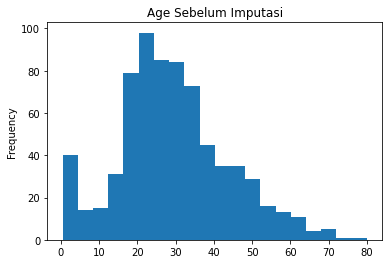

In [4]:
# melihat distribusi awal dari kolom Age
df_titanic.Age.plot.hist(title="Age Sebelum Imputasi", bins=20)

In [5]:
# melihat kecondongan distribusi kolom Age. Kecondongan yang baik itu dari -1 sampai dengan 1
df_titanic.Age.skew()

0.38910778230082704

In [6]:
df_titanic.Age.mean()

29.69911764705882

In [7]:
df_titanic.Age.median()

28.0

__Imputasi__

In [8]:
# fungsi fillna di pandas dapat digunakan untuk imputasi missing values
# taruh hasilnya di variable baru untuk mempermudah pengamatan
df_titanic['Age_mean_uni'] = df_titanic.Age.fillna(df_titanic.Age.mean())
df_titanic['Age_median_uni'] = df_titanic.Age.fillna(df_titanic.Age.median())

__Setelah imputasi__

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_median_uni'}>, <AxesSubplot:>]],
      dtype=object)

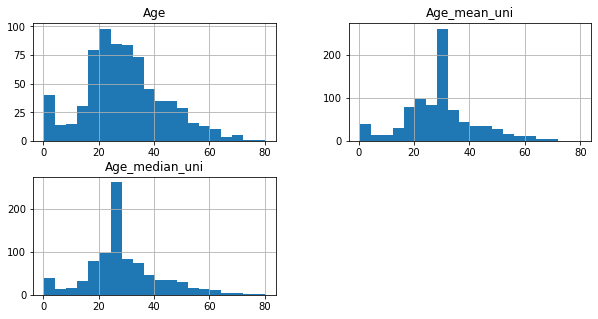

In [9]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].hist(bins=20, figsize=(10,5))

In [10]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_median_uni    0.510245
dtype: float64

__Imputasi dengan Mean berdasarkan kelompok/parameter lain (Multivariate)__ <br>

Solusi alternatif jika kita ingin melakukan imputasi missing value, dibandingkan kita memukul rata isian missing value pada kolom ```Age``` dengan mean atau median dari seluruh data. <br>

Kita bisa mengelompokan terlebih dahulu berdasarkan kolom lain (dalam hal ini adalah ```Sex``` sehingga imputasi dilakukan terhadap kelompok yang sama sehingga diharapkan hasilnya lebih <i>smooth</i>.

__Sebelum imputasi__

In [11]:
# mengetahui mean per kelompok sex, kita menggunakan groupby
df_grouped = df_titanic[['Sex', 'Age']].groupby(['Sex']).mean()
df_grouped

,Age
Sex,
female,27.915709
male,30.726645


__Imputasi__

Setelah mengetahui mean dari masing-masing group, kita bisa melakukan imputasi.

In [12]:
# imputasi untuk male group

# filter kondisi 
condition = df_titanic['Sex'] == 'male'

# tangkap nilai mean untuk laki2
mean_male = df_grouped.loc['male','Age']

# imputasi
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_male)

In [13]:
# proses untuk female sama seperti diatas
condition = df_titanic['Sex'] == 'female'
mean_female = df_grouped.loc['female','Age']
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_female)

__Setelah imputasi__

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_mean_multi'}>, <AxesSubplot:>]],
      dtype=object)

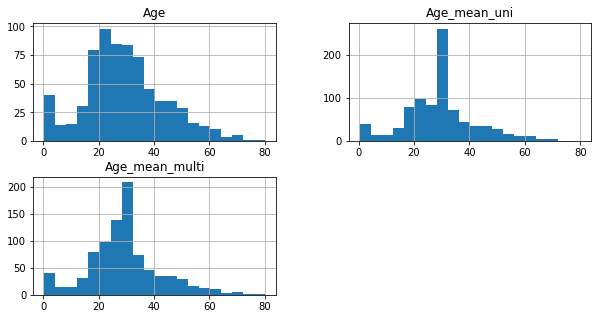

In [14]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].hist(bins=20, figsize=(10,5))

In [15]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_mean_multi    0.424586
dtype: float64

__Simpulan__: Melihat hasil skewness dari ```Age_mean_multi``` yang cukup bagus (mendekati 0), kita memilih hasil ini untuk digunakan sebagai parameter bantu pada analisis selanjutnya. 

Namun dibuka kemungkinan apabila saat implementasi model, peforma dari model masih tidak sesuai harapan, ```Age_mean_multi``` dapat diganti dengan ```Age_mean_uni```.

### Kolom Cabin

Pada kolom ```Cabin``` dikarenakan mayoritas data adalah missing value dan kita punya tidak cukup ide untuk mengisinya. 

Apabila kita paksa imputasi akan sangat bias dan tidak bisa menggambarkan situasi sebenarnya.  

Maka, solusinya kolom ```cabin``` lebih baik dihilangkan menggunakan fungsi ```.drop()```.

In [16]:
df_titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [17]:
# drop kolom menggunakan fungsi .drop()
df_titanic.drop(columns='Cabin', inplace = True)

In [18]:
# cek sisa kolom
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi'],
      dtype='object')

__Simpulan__: Kolom ```Cabin``` sudah tidak lagi menjadi fitur dalam pengembangan model.

### Kolom Embarked

In [19]:
# cek value counts (size masing-masing kelas)
df_titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
# cek detail data yang kosong
df_titanic[df_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0,62.0,62.0


In [21]:
df_titanic.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Kita bisa membuat dugaan awal bahwa kolom ```Embarked``` ini mungkin ada kaitannya dengan kolom lain yakni ```Ticket```. 

Untuk itu lakukan penelusuran, apakah ada nomor tiket dengan pola sejenis dengan data hilang.

In [22]:
# polanya di cek dengan fungsi .match
# pola yang digunakan adalah cari tiket yang diawali dengan '113'

df_titanic[(df_titanic.Ticket.str.match('^113'))].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,38.0,38.0
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0,S,29.0,29.0,29.0
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,S,45.0,45.0,45.0


In [23]:
# Cek tiket dengan nomor yang sama df_titanic[(df_titanic.Ticket== '113776)]

In [24]:
# cek distribusi count tiket dengan pola str '113'
df_titanic[df_titanic.Ticket.str.match('^113')].Embarked.value_counts()

Embarked
S    41
C     4
Name: count, dtype: int64

Dari distribusinya tiket dengan nomor seri 113, memiliki probabilitas lebih tinggi bahwa penumpang naik dari pelabuhan ```S```.

In [25]:
# kita bisa menggunakan modus dari distribusinya, yaitu 'S'
# implementasi menggunakan fungsi .fillna()
df_titanic.Embarked.fillna('S', inplace = True)

In [26]:
# cek setelah implementasi
df_titanic.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

__Simpulan__: Hasil imputasi missing values pada kolom ```Embarked```, menambah jumlah kategori ```S``` dari 644 ke 646.

## Penanganan Outlier

Sumber:

1. https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/
2. https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate
3. https://nitin9809.medium.com/outlier-detection-and-treatment-part-1-aa0b09f60e50

Beberapa fungsi dan library yang digunakan:
1. library [```DBSCAN```](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).
2. library [```MinMaxScaler```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. [```df.quantile()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
4. [```df.mean()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).
5. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna).
5. dst.

### Deteksi outlier secara univariate

__Box plot__

Jarak antar bagian di box menunjukkan derajat dispersi (penyebaran) dan skewness (kecondongan) dalam data. 

Bagian dari box adalah bidang yang menyajikan __interquartile range (IQR)__.

Panjang box ditentukan oleh IQR ini.

Semakin tinggi (jika boxplot vertikal) atau semakin lebar (jika boxplot horizontal) bidang IQR ini, menunjukkan data semakin menyebar.

<AxesSubplot:>

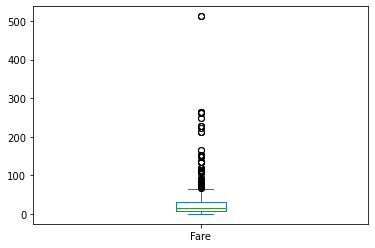

In [27]:
df_titanic.Fare.plot.box()

**Interquartile range**

IQR mendeskripsi bagian tengah atau 50% dari nilai jika diurutkan dari terendah ke tertinggi.

Untuk mendapatkan nilai IQR, langkah pertama adalah menemukan ```median``` dari ```batas bawah (Q1)``` dan ```batas atas (Q3)``` dari distribusi data.

IQR adalah beda antara Q3 dan Q1.

Kemudian setelah mendapatkan IQR, kita akan menghitung whisker minimal (iqr_lower) dan maksimal (iqr_upper).

Nilai diluar iqr_lower dan iqr_upper adalah outlier.


<details>

Penjelasan IQR
![0_3FE0spyQlEEWhYV5%281%29.png](attachment:0_3FE0spyQlEEWhYV5%281%29.png)
    
Hubungan IQR pada Box plot
![1_2c21SkzJMf3frPXPAR_gZA.png](attachment:1_2c21SkzJMf3frPXPAR_gZA.png)
</details>

In [28]:
# menghitung Q1 dan Q3
q1 = df_titanic['Fare'].quantile(0.25)
q3 = df_titanic['Fare'].quantile(0.75)

# menghitung IQR
iqr = q3 - q1

# menghitung batas bawah dan batas atas
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

In [29]:
# print hasil
(iqr_lower, iqr_upper)

(-26.724, 65.6344)

In [30]:
# contoh outlier dengan nilai kurang dari iqr_lower
df_titanic[df_titanic.Fare < iqr_lower]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi


In [31]:
# contoh outlier dengan nilai lebih dari iqr_upper
df_titanic[df_titanic.Fare > iqr_upper].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,C,19.000000,19.0,19.000000
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,S,29.699118,28.0,30.726645
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S,63.000000,63.0,63.000000


In [32]:
(df_titanic.Fare > iqr_upper).sum()

116

Apa yang harus kita lakukan, pilihan opsinya:
1. Membuang outlier tersebut.
2. Melakukan imputasi nilai. 

Disini kami contohkan untuk melakukan imputasi menggunakan mean.

In [33]:
# ganti nilai outliner dengan na sehingga menjadi missing value
df_titanic['Fare_iqr'] = df_titanic['Fare']
df_titanic.loc[df_titanic['Fare_iqr'] < iqr_lower, 'Fare_iqr'] = pd.NA
df_titanic.loc[df_titanic['Fare_iqr'] > iqr_upper, 'Fare_iqr'] = pd.NA

In [34]:
# cek implementasi missing value
df_titanic.Fare_iqr.isna().sum()

116

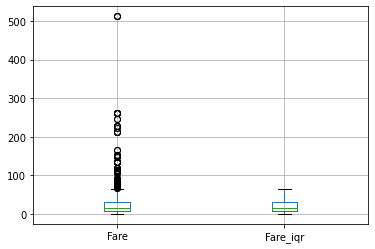

In [35]:
# imputasi NaN dengan mean

df_titanic['Fare_iqr'].fillna(df_titanic.Fare.mean(),inplace=True)

# tampilkan box plot
boxplot = df_titanic.boxplot(column=['Fare','Fare_iqr'])

__Simpulan__: Perlu kehati-hatian dalam mengimplementasikan metode IQR. IQR dapat digunakan apabila sebaran data kita sempit.

### Deteksi outlier secara multivariate

Deteksi outlier bedasarkan pengamatan terhadap lebih dari 1 features biasa dikenal dengan multivariate outlier detections. 

Dalam kasus ini kita coba mengkoreksi data outlier ```Fare``` dengan bantuan dari variable lain yakni ```Age```.

Kemudian kita melihat apakah ada outlier dengan melihat kerapatan data menggunakan metode [__Density-Based Spatial Clustering of Applications with Noise (DBSCAN)__](https://towardsdatascience.com/dbscan-with-python-743162371dca).
> Metode clustering menggunakan machine learning untuk memisahkan cluster dengan density tinggi dari cluster dengan density rendah.

__Sebelum imputasi__

<AxesSubplot:xlabel='Age_scaled', ylabel='Fare_scaled'>

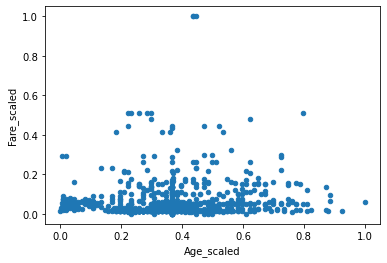

In [36]:
# load dictionary
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# lakukan standarisasi data agar skalanya sama
scaler = MinMaxScaler()
df_titanic['Fare_scaled'] = scaler.fit_transform(df_titanic[['Fare']])
df_titanic['Age_scaled'] = scaler.fit_transform(df_titanic[['Age_mean_uni']])

# visualisasikan dua features ini dalam bentuk scatter
df_titanic.plot.scatter(y = 'Fare_scaled', x = 'Age_scaled')

<details>

Penjelasan parameter:
![1_PenJiBtSaeDZD9P9XhLBmA.png](attachment:1_PenJiBtSaeDZD9P9XhLBmA.png)
</details>

In [37]:
DBSCAN_model = DBSCAN(eps = 0.5, metric = 'euclidean', min_samples = 3, n_jobs = -1)

# fit model
clusters = DBSCAN_model.fit_predict(df_titanic[['Fare_scaled', 'Age_scaled']])

# simpan hasil clustering ke kolom baru
df_titanic['Is_outlier'] = clusters

# hasil cluster akan ada dua 0 tidak outlier, 1 merupakan outlier
# pd.Series(clusters).value_counts() ==> cek

In [38]:
df_titanic.Is_outlier.value_counts()

Is_outlier
0    888
1      3
Name: count, dtype: int64

In [39]:
# lookup data yang outlier
df_titanic[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1


__Imputasi dengan Mean dari kolom Fare saja__

In [40]:
# membuat satu kolom baru yang isinya sama dengan Fare
df_titanic['Fare_dbscan'] = df_titanic['Fare']

In [41]:
# dapatkan mean dari Fare
fare_mean = df_titanic[df_titanic['Is_outlier']==0].Fare.mean()

# isikan nilai mean ke nilai outlier
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean

__Setelah imputasi__

In [42]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,30.582164
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164


__Imputasi dengan Mean hasil analisis dari kolom Embarked__

Sebagaimana kita ketahui bahwa hasil deteksi outlier di atas, kesemuanya berangkat dari pelabuhan C dengan seri ```Ticket``` yang sama. 

Dibandingkan menggunakan mean dari seluruh penumpang, kita bisa coba gunakan mean dari penumpang lain dari kelompok pemberangkatan ```Embarked``` yang sama.

In [43]:
df_titanic.loc[df_titanic['Is_outlier']==0, ['Fare','Embarked']].groupby(by='Embarked').agg(['describe'])

Fare                                                            
         describe                                                            
            count       mean        std     min      25%      50%      75%   
Embarked                                                                     
C           165.0  51.729143  57.953950  4.0125  13.4167  28.7125  76.7292  \
Q            77.0  13.276030  14.188047  6.7500   7.7500   7.7500  15.5000   
S           646.0  27.243651  35.952905  0.0000   8.0500  13.0000  27.9000   

                   
                   
              max  
Embarked           
C         262.375  
Q          90.000  
S         263.000

In [44]:
# isikan ke nilai outlier yang sudah jadi NA
fare_mean_C = df_titanic[(df_titanic['Is_outlier'] == 0) & (df_titanic['Embarked'] == 'C')].Fare.mean()
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean_C

In [45]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,51.729143
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143


__Jika kita mengasumsikan terjadi salah ketik di nama tiket__

Dari deskripsi statistik masing-masing group ```Embarked``` mean untuk data ```Fare``` penumpang yang berangkat dari pelabuhan C memiliki mean di nilai ```51.73```. 

Kita dapat juga berasumsi bahwa outlier ```512.3292``` itu bisa jadi typo dan mungkin maksudnya ```51.2329```

In [46]:
# langsung koreksi 
# df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = 51.2329

__Simpulan__: Untuk mempertajam analisis kita saat mendeteksi outlier, kita bisa menggunakan kolom lain sebagai fitur tambahan dan mengimplementasikannya menggunakan DBSCAN.

Kita menggunakan kolom Ticket sebagai fitur yang dapat membantu kita mendeteksi outlier pada kolom Fare.

# Feature Enginering 

Dari hasil sementara EDA, tanamkan hal berikut di pikiran kita:
1. Apakah ada kemungkinan untuk mendapatkan tambahan informasi atau mengurangi noise dari datanya.
2. Bisakah kita mengkombinasikan data dalam bentuk berbeda, sehingga menjadi lebih informatif.
3. Adakah kemungkinan kita untuk menggunakan data tambahan dari eksternal.

Sumber: https://towardsdatascience.com/what-is-feature-engineering-bfd25b2b26b2

Kunci: __KREATIF !__

## Ekstraksi inisial dari kolom Name sebagai fitur

Jika kita telusuri di kolom name akan terlihat bahwa kolom ini adalah kolom yang sangat unit dengan tingkat cardinality yang tinggi. 

Beberapa dari kita mungkin akan melakukan drop terhadap kolom ini.

Namun jika bisa lebih teliti, ada satu pola yang kita bisa ekstrak dan memberikan nilai tambah pada dataset kita.

Dalam hal ini, kita akan melakukan ekstraksi gelar sosial pada nama seperti Mr. Miss. Mrs. sebagai menggunakan regex.

Beberapa fungsi dan library yang digunakan:
1. [```RegEx```](https://docs.python.org/3/howto/regex.html).
2. ```df.column.replace()```.
3. ```df.column.value_counts()```
4. Library [```One Hot Encoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
5. dst.

In [47]:
df_titanic[['Name']].sample(5)

,Name
723,"Hodges, Mr. Henry Price"
118,"Baxter, Mr. Quigg Edmond"
533,"Peter, Mrs. Catherine (Catherine Rizk)"
171,"Rice, Master. Arthur"
169,"Ling, Mr. Lee"


In [48]:
# extract gelar pada nama menggunakan regex dan simpan ke kolom baru
df_titanic['Initial'] = df_titanic.Name.str.extract('(\w+)\.')

In [49]:
# cek distribusi count
df_titanic.Initial.value_counts()

Initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [50]:
# melakukan perbaikan atas inisial yang munkin salah tulis, atau tidak sesuai kriteria
# menggunakan fungsi .replace()

replace_dict =  {'Mlle': 'Miss',
                 'Mme': 'Miss',
                 'Ms': 'Miss',
                 'Dr': 'Mr',
                 'Major': 'Mr',
                 'Lady': 'Mrs',
                 'Countess': 'Mrs',
                 'Jonkheer': 'Other',
                 'Col': 'Other',
                 'Rev': 'Other',
                 'Capt': 'Mr',
                 'Sir': 'Mr',
                 'Don': 'Mr'}

df_titanic['Initial'].replace(replace_dict,inplace=True)

In [51]:
# cek distribusi count setelah perbaikan

df_titanic.Initial.value_counts()

Initial
Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: count, dtype: int64

__Simpulan__: Telah diekstraksi data dari kolom Name menjadi informasi yang bernilai tambah, dan disimpan pada kolom Initial.

## Pengelompokan penumpang berdasarkan kolom Age (Binning)

[Binning](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950) adalah teknik mengkonversi data numerical menjadi categorical, dengan menggunakan range.

Fungsi yang digunakan, [```pd.cut()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

Misalkan:

|Age|Category|
|--- |--- |
|0-15|child|
|16-30|young_adult|
|31-50|adult|
|>50|elderly|

In [52]:
# membuat varible baru bernama cut_points
# merupakan batas dari setiap kategori
cut_points = [0, 15, 30, 50, 100]

# membuat label atas kategorinya
age_label = ['child', 'young_adult', 'adult', 'elderly']

# implementasi label tersebut dengan membuat kolom baru bernama age_label
df_titanic['Age_group'] = pd.cut(df_titanic['Age_mean_uni'], bins=cut_points, labels=age_label, include_lowest=True)

In [53]:
# print hasil implementasi
df_titanic.sample(3)[['Age_group','Age_mean_uni']]

,Age_group,Age_mean_uni
602,young_adult,29.699118
140,young_adult,29.699118
55,young_adult,29.699118


__Simpulan__: Telah dikategorikan range ```Age``` pada kolom ```Age_group```.

## Encoding

Beberapa fungsi dan library yang digunakan:
1. library [```LabelEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).
2. dictionary ```{}```.
3. [```df.Series.map()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html).
4. dst.

### Kolom Sex

Label encoding digunakan untuk mengubah data categorical menjadi nominal. 

In [54]:
# cek ada berapa label pada kolom sex
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

Karena hanya ada 2 distinct values (low cardinality), kita cukup pakai dictionary untuk labeling.

In [55]:
# membuat dictionary, 0 untuk male dan 1 untuk female
label_sex = {'male':0,'female':1}

# gunakan fungsi map pada pandas untuk mengaplikasikan labeling
df_titanic['Sex_enc'] = df_titanic['Sex'].map(label_sex)

# print hasil implementasi
df_titanic[['Name','Sex','Sex_enc']].sample(3)

,Name,Sex,Sex_enc
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,1
224,"Hoyt, Mr. Frederick Maxfield",male,0
531,"Toufik, Mr. Nakli",male,0


__Simpulan__: kategori male dan female sudah berubah menjadi 0 dan 1.

### Kolom Embarked

Jika jumlah kelas pada variabel kategori sangat banyak (high cardinality).

Kita __tidak mungkin melakukannya secara manual__ menggunakan dictionary. 

Oleh karenanya kita perlu menggunakan bantuan library salah satunya adalah [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) di scikit learn.

In [56]:
# load library
from sklearn.preprocessing import LabelEncoder

# inisiasi encoder
le = LabelEncoder()

# fiting dan transform ke model
df_titanic['Embarked_enc'] = le.fit_transform(df_titanic['Embarked'])

In [57]:
# print hasil implementasi
df_titanic[['Name','Embarked','Embarked_enc']].sample(3)

,Name,Embarked,Embarked_enc
139,"Giglio, Mr. Victor",C,0
356,"Bowerman, Miss. Elsie Edith",S,2
48,"Samaan, Mr. Youssef",C,0


__Simpulan__: kategori C, Q, dan S sudah berubah menjadi 0, 1 dan 2.

### Kolom Initial

Dari hasil ekstraksi fitur, kita memperoleh lima jenis kategorikal.

Sebelumnya kita sudah kenal cara melakukan encoding dengan menggunakan dictionary dan LabelEncoder.

Untuk kali ini akan kita implementasikan satu teknik lainnya, yaitu One Hot Encoding.

__Kenapa kita menggunakannya?__

Label Encoding adalah kategori sekarang memiliki [urutan (natural order)](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/). 

Komputer secara alami akan memberikan angka yang lebih tinggi, bobot yang lebih tinggi. 

Untuk mengatasinya kita menggunakan One Hot Encoding.

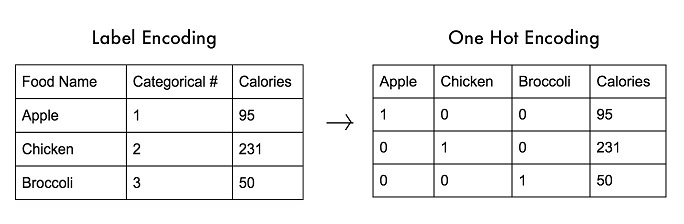

Sumber: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

In [58]:
# load library 
from sklearn.preprocessing import OneHotEncoder 

# inisiasi encoder 
ohc = OneHotEncoder(handle_unknown='ignore')

# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Initial']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Initial'].unique()]
df_initial_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_initial_ohc.sample(3)

,Mr,Mrs,Miss,Master,Other
632,0.0,0.0,1.0,0.0,0.0
719,0.0,0.0,1.0,0.0,0.0
594,0.0,0.0,1.0,0.0,0.0


In [59]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_initial_ohc], axis=1)

In [60]:
# print hasil implementasi
df_titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_dbscan,Initial,Age_group,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,...,9.8250,Miss,young_adult,1,2,0.0,1.0,0.0,0.0,0.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,...,7.7500,Mr,adult,0,1,0.0,0.0,1.0,0.0,0.0
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,...,7.7958,Mr,young_adult,0,2,0.0,0.0,1.0,0.0,0.0


__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Initial```.

### Kolom Age_group

Sama seperti sebelumnya, kita akan implementasikan OHE untuk kolom ```Age_group```.

In [61]:
# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Age_group']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Age_group'].unique()]
df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_age_group_ohc.sample(3)

,young_adult,adult,elderly,child
840,0.0,0.0,0.0,1.0
156,0.0,0.0,0.0,1.0
19,0.0,0.0,0.0,1.0


In [62]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_age_group_ohc], axis=1)

In [63]:
# print hasil implementasi
df_titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.000,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.225,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Age_group```.

In [64]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi', 'Fare_iqr', 'Fare_scaled', 'Age_scaled', 'Is_outlier',
       'Fare_dbscan', 'Initial', 'Age_group', 'Sex_enc', 'Embarked_enc', 'Mr',
       'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
       'child'],
      dtype='object')

In [65]:
columns_to_keep = ['Survived', 'Pclass', 'Fare_dbscan', 'Sex_enc', 'Embarked_enc', 'Mr',
                   'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
                   'child']

In [66]:
df_titanic = df_titanic[columns_to_keep]

In [67]:
df_titanic.head(3)

,Survived,Pclass,Fare_dbscan,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
0,0,3,7.2500,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,71.2833,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,7.9250,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Regular Expression

Regex merupakan sebuah teks (string) yang mendefinisikan sebuah pola pencarian sehingga dapat membantu kita untuk melakukan matching (pencocokan), locate (pencarian), dan manipulasi teks.


## RegEx Token


__Special characters__

<table>
  <tbody><tr>
    <td class="key_td"><code>\</code></td>
    <td>escape special characters</td>
  </tr>
  <tr>
    <td class="key_td"><code>.</code></td>
    <td>matches any character</td>
  </tr>
  <tr>
    <td class="key_td"><code>^</code></td>
    <td>matches beginning of string</td>
  </tr>
  <tr>
    <td class="key_td"><code>$</code></td>
    <td>matches end of string</td>
  </tr>
  <tr>
    <td class="key_td"><code>[5b-d]</code></td>
    <td>matches any chars '5', 'b', 'c' or 'd'</td>
  </tr>
  <tr>
    <td class="key_td"><code>[^a-c6]</code></td>
    <td>matches any char except 'a', 'b', 'c' or '6'</td>
  </tr>
  <tr>
    <td class="key_td"><code>R|S</code></td>
    <td>matches either regex <code>R</code> or regex <code>S</code></td>
  </tr>
  <tr>
    <td class="key_td"><code>()</code></td>
    <td>creates a capture group and indicates precedence</td>
  </tr>
</tbody></table>

__Special sequences__

<table>
<tbody><tr>
<td class="key_td"><code>\A</code></td>
<td>start of string</td>
</tr>
<tr>
<td class="key_td"><code>\b</code></td>
<td>matches empty string at word boundary (between <code>\w</code> and <code>\W</code>)</td>
</tr>
<tr>
<td class="key_td"><code>\d</code></td>
<td>digit</td>
</tr>
<tr>
<td class="key_td"><code>\s</code></td>
<td>whitespace: <code>[ \t\n\r\f\v]</code></td>
</tr>
<tr>
<td class="key_td"><code>\w</code></td>
<td>alphanumeric: <code>[0-9a-zA-Z_]</code></td>
</tr>
</tbody></table>

                    
__Quantifiers__

<table>
  <tbody><tr>
    <td class="key_td"><code>*</code></td>
    <td>0 or more (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>+</code></td>
    <td>1 or more (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>?</code></td>
    <td>0 or 1 (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m}</code></td>
    <td>exactly <code>m</code>m occurrences</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m, n}</code></td>
    <td>from <code>m</code> to <code>n</code>. <code>m</code> defaults to 0, <code>n</code> to infinity</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m, n}?</code></td>
    <td>from <code>m</code> to <code>n</code>, as few as possible</td>
  </tr>
</tbody></table>

## Menggunakan Library RegEx 

In [68]:
# library untuk regex di python
import re

#### Pencarian

Teks:

> Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 persen menjadi Rp14.050 dari sebelumnya Rp6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 persen menuju Rp1.015 dari sebelumnya Rp525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 persen menuju Rp202 dari sebelumnya Rp107. (WEHA) meningkat 80,36 persen menjadi Rp202 dari sebelumnya Rp112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 persen menuju Rp195 pekan lalu Rp114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 persen menjadi Rp5.775 dari sebelumnya Rp3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 persen menuju Rp615. Sementara itu, mengutip keterangan resmi Bursa Efek Indonesia (BEI), pada pekan kedua bulan Agustus 2021, data perdagangan BEI menunjukkan bahwa rata-rata nilai transaksi harian (RNTH) mencatatkan peningkatan sebesar 3,64 persen menjadi Rp15,6 triliun dari Rp15,05 triliun pada pekan lalu. Baca Juga : BEI: Sepekan IHSG Turun 1 Persen, Transaksi Harian Naik Jadi Rp15,6 Triliun "IHSG selama sepekan mengalami penurunan 1,03 persen atau berada pada level 6.139,49 dari posisi 6.203,43 pada pekan sebelumnya," papar keterangan BEI. Penurunan sebesar 1,08 persen terjadi pada nilai kapitalisasi pasar Bursa selama sepekan, menjadi sebesar Rp7.400,66 triliun dari Rp7.481,27 triliun dari sepekan yang lalu.

Link : [Sumber Teks](https://market.bisnis.com/read/20210814/7/1429669/saham-saham-paling-melesat-sepekan-ada-yang-naik-106-persen.)

In [69]:
import requests
url = 'https://raw.githubusercontent.com/...'
teks = requests.get('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/berita.txt').text

# Mencari semua kode perusahaan
re.findall(r"[A-Z]{4}",teks) 

['JAKA',
 'IHSG',
 'FISH',
 'PEGE',
 'CANI',
 'WEHA',
 'INCF',
 'TECH',
 'DIGI',
 'RNTH',
 'IHSG',
 'IHSG']

In [70]:
# Mencari semua nama Perusahaan 
re.findall(r"PT.*?Tbk\.",teks)

['PT FKS Multi Agro Tbk.',
 'PT Panca Global Kapital Tbk.',
 'PT Capitol Nusantara Tbk.',
 'PT Indo Komoditi Corpora Tbk.',
 'PT Indosterling Technomedia Tbk.',
 'PT Arkadia Digital Media Tbk.']

In [71]:
# Mencari semua rupiah
re.findall(r"(Rp.*?)[\s]",teks)

['Rp14.050',
 'Rp6.800.',
 'Rp1.015',
 'Rp525.',
 'Rp202',
 'Rp107.',
 'Rp202',
 'Rp112.',
 'Rp195',
 'Rp114.',
 'Rp5.775',
 'Rp3.520.',
 'Rp615.',
 'Rp15,6',
 'Rp15,05',
 'Rp15,6',
 'Rp7.400,66',
 'Rp7.481,27']

#### Pencocokan

In [72]:
# Melakukan pencocokan pola
# Pola satu di tes padd email
# JIka sesuai akan di print 'Oke'
test = re.match(r'[a-zA-Z].*@gmail\.go\.id','gede86yudi@gmail.go.id')

if test:
    print('Oke')
else:
    print('Salah')

Oke


#### Replace/Substitusi

In [73]:
# Melakukan substitusi
# penulisan persen diganti %
re.sub(r'(\d)\spersen','\\1 %',teks)

'Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 % menjadi Rp14.050 dari sebelumnya Rp6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 % menuju Rp1.015 dari sebelumnya Rp525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 % menuju Rp202 dari sebelumnya Rp107. (WEHA) meningkat 80,36 % menjadi Rp202 dari sebelumnya Rp112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 % menuju Rp195 pekan lalu Rp114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 % menjadi Rp5.775 dari sebelumnya Rp3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 % menuju Rp615. Sementara itu, mengutip keterangan resmi Bursa Efek Indone

In [74]:
# Melakukan substitusi
# penulisan Rp diganti IDR
re.sub(r'Rp(\d)','IDR\\1',teks)

'Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 persen menjadi IDR14.050 dari sebelumnya IDR6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 persen menuju IDR1.015 dari sebelumnya IDR525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 persen menuju IDR202 dari sebelumnya IDR107. (WEHA) meningkat 80,36 persen menjadi IDR202 dari sebelumnya IDR112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 persen menuju IDR195 pekan lalu IDR114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 persen menjadi IDR5.775 dari sebelumnya IDR3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 persen menuju IDR615. Sementara 

## Mengaplikasikan RegEx di Pandas

#### Pencocokan

In [75]:
# Load file satu menjadi dataset
# Diberi nama df_case_bumd2017

df_case_bumd2017 = pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/bumd2017.csv')

In [76]:
#  matching
df_case_bumd2017[df_case_bumd2017['nama_bumd'].str.match(r"^PD.*?Jaya")]

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
5,2017,PD Dharma Jaya,Aset,-,Data belum tersedia
6,2017,PD Dharma Jaya,Ekuitas,-,Data belum tersedia
7,2017,PD Dharma Jaya,Pendapatan Usaha,-,Data belum tersedia
8,2017,PD Dharma Jaya,Laba Usaha,-,Data belum tersedia
9,2017,PD Dharma Jaya,Laba Bersih,-,Data belum tersedia


#### Ekstraksi

In [77]:
#  extract
df_case_bumd2017.nama_bumd.str.extract(r"^(PD.*?Jaya)").head()

,0
0,PD AM Jaya
1,PD AM Jaya
2,PD AM Jaya
3,PD AM Jaya
4,PD AM Jaya


#### Replace

In [78]:
# Mengganti PT atau PD dengan spasi kosong
df_case_bumd2017['nama_bumd'].str.replace(r"^(PT|PD)",r"",regex=True).sample(3)

11                              Pasar Jaya
73     Kawasan Berikat Nusantara (Persero)
44                      Jakarta Tourisindo
Name: nama_bumd, dtype: object

In [79]:
df_case_bumd2017.nama_bumd.apply(lambda x: re.sub("^(PT|PD)", "", x)).sample(3)

29     Food Station Tjipinang Jaya
33             Jakarta Propertindo
67                Pembangunan Jaya
Name: nama_bumd, dtype: object